In [1]:
#1.1 Handling Missing Values
from sklearn.impute import KNNImputer
import pandas as pd

# Example dataset
data = pd.DataFrame({
    'Patient_ID': [1, 2, 3],
    'Age': [25, None, 35],
    'Diagnosis': ['Diabetes', None, 'Hypertension']
})

# Apply KNN Imputer
imputer = KNNImputer(n_neighbors=2)
data['Age'] = imputer.fit_transform(data[['Age']])
print("Data after imputation:\n", data)


Data after imputation:
    Patient_ID   Age     Diagnosis
0           1  25.0      Diabetes
1           2  30.0          None
2           3  35.0  Hypertension


In [22]:
#1.2 Outlier Detection
from sklearn.ensemble import IsolationForest
import numpy as np

# Example data
X = np.array([[10], [12], [14], [100], [15]])

# Detecting outliers
clf = IsolationForest(contamination=0.2, random_state=42)
outliers = clf.fit_predict(X)
print("Outlier labels:", outliers)


Outlier labels: [ 1  1  1 -1  1]


In [23]:
#1.3 Addressing Imbalanced Classes
from imblearn.over_sampling import SMOTE

# Example dataset
X = [[1], [2], [3], [4], [5]]
y = [0, 0, 0, 1, 1]

# Adjust n_neighbors to 1 since the minority class has only 2 samples
smote = SMOTE(random_state=42, k_neighbors=1)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print resampled class distribution
print("Resampled class distribution:", 
      {label: sum(1 for i in y_resampled if i == label) for label in set(y_resampled)})



Resampled class distribution: {0: 3, 1: 3}


In [24]:
#2.1 Baseline Model with Decision Tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Decision Tree Model
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, predictions):.2f}")


Accuracy: 1.00


Accuracy: 0.50

Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



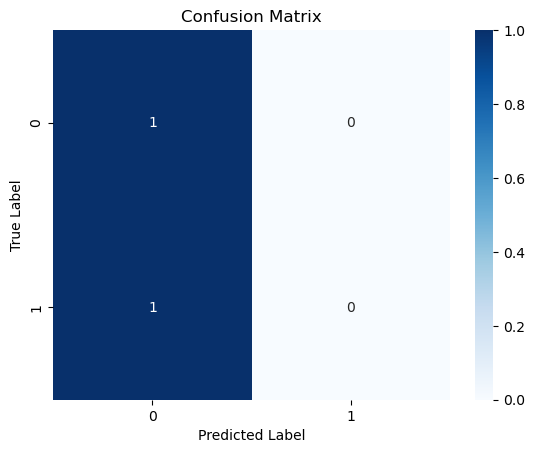

In [10]:
#2.2 Advanced Model with Random Forest and 2.3 Evaluation Metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Example dataset (update this with your actual dataset)
X = [[1], [2], [3], [4], [5]]
y = [0, 0, 0, 1, 1]

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42, k_neighbors=1)  # Adjust k_neighbors based on minority class size
X_resampled, y_resampled = smote.fit_resample(X, y)

# Stratified train-test split to maintain class proportions
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# Random Forest Classifier
clf = RandomForestClassifier(
    random_state=42,
    n_estimators=30,
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    n_jobs=-1,
    max_samples=0.8
)

# Train the model
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification Report with zero_division handling
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

